In [1]:
import pandas as pd
import re
import string
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# Preprocessing data

Donwload the Sentiment140 Dataset:

In [2]:
!curl -L http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip > ~/code/mfcorredor/DeepFeelings/raw_data/sentiment140.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   270  100   270    0     0    789      0 --:--:-- --:--:-- --:--:--   815
100 77.5M  100 77.5M    0     0  2351k      0  0:00:33  0:00:33 --:--:-- 2769k02k      0  0:00:36  0:00:24  0:00:12 3018k


In [6]:
!unzip -d ~/code/mfcorredor/DeepFeelings/raw_data/ ~/code/mfcorredor/DeepFeelings/raw_data/sentiment140.zip

Archive:  /Users/luciagd/code/mfcorredor/DeepFeelings/raw_data/sentiment140.zip
  inflating: /Users/luciagd/code/mfcorredor/DeepFeelings/raw_data/testdata.manual.2009.06.14.csv  
  inflating: /Users/luciagd/code/mfcorredor/DeepFeelings/raw_data/training.1600000.processed.noemoticon.csv  


In [7]:
df_train = pd.read_csv("../raw_data/training.1600000.processed.noemoticon.csv",
                names=['polarity', 'id', 'date', 'query', 'user', 'text'],
                encoding='latin-1')

In [8]:
df_test = pd.read_csv("../raw_data/testdata.manual.2009.06.14.csv",
                names=['polarity', 'id', 'date', 'query', 'user', 'text'],
                encoding='latin-1')

Drop no usefull columns:

In [9]:
df_train = df_train.drop(columns=['id', 'date', 'query', 'user'])
df_test = df_test.drop(columns=['id', 'date', 'query', 'user'])

Update polarity:

In [10]:
df_train["polarity"] = df_train["polarity"].replace({0: 0, 4: 1})
df_test["polarity"] = df_train["polarity"].replace({0: 0, 4: 1})

The set is balancing?:

In [11]:
df_train.polarity.value_counts()

0    800000
1    800000
Name: polarity, dtype: int64

Get a samll sample to work in:

In [12]:
df_train_small = df_train.sample(n=50000)
df_train_small.polarity.value_counts()

0    25161
1    24839
Name: polarity, dtype: int64

In [13]:
df_train_small["text"].iloc[345]

"I'm having Jonas depression, I wish tomorrow was wembley again, boohoo "

In [14]:
X_train = df_train_small[["text"]]
y_train = df_train_small[["polarity"]]
X_test = df_test[["text"]]
y_test = df_test[["polarity"]]

**Preprocessing**

In [15]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation,
    remove words containing numbers, remove numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = ''.join([i for i in text if not i.isdigit()])
    return text

In [16]:
X_train["text"] = X_train["text"].apply(clean_text)
X_test["text"] = X_test["text"].apply(clean_text)

/var/folders/qr/lcd4mzfs405dggq4hnsm8d900000gn/T/ipykernel_17902/1724217882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["text"] = X_train["text"].apply(clean_text)
/var/folders/qr/lcd4mzfs405dggq4hnsm8d900000gn/T/ipykernel_17902/1724217882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["text"] = X_test["text"].apply(clean_text)


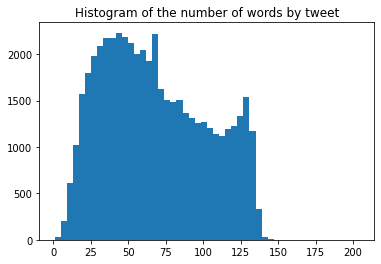

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hist(X):
    lenn = [len(i) for i in X]
    plt.hist(lenn, bins=50)
    plt.title('Histogram of the number of words by tweet')
    plt.show()
    
plot_hist(X_train["text"])

In [18]:
ls_train = X_train["text"].tolist()
X_train = [text_to_word_sequence(i) for i in ls_train]

ls_test = X_test["text"].tolist()
X_test = [text_to_word_sequence(i) for i in ls_test]

In [21]:
X_train_pad = pad_sequences(X_train, padding='post', dtype=object, value="xxx", maxlen=140)
X_test_pad = pad_sequences(X_test, padding='post', dtype=object, value="xxx", maxlen=140)